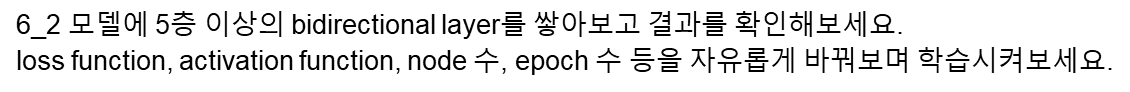

In [2]:
!pip uninstall numpy
!pip install --upgrade numpy==1.16.1

Uninstalling numpy-1.18.5:
  Would remove:
    /usr/bin/f2py
    /usr/bin/f2py3
    /usr/bin/f2py3.6
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.6
    /usr/local/lib/python3.6/dist-packages/numpy-1.18.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/numpy.libs/libgfortran-ed201abd.so.3.0.0
    /usr/local/lib/python3.6/dist-packages/numpy.libs/libopenblasp-r0-34a18dc3.3.7.so
    /usr/local/lib/python3.6/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.18.5
     |████████████████████████████████| 17.3MB 200kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [1]:
import tensorflow.keras
tensorflow.keras.__version__

'2.4.0'

In [2]:
import numpy as np
np.__version__

'1.16.1'

In [3]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
import matplotlib.pyplot as plt

In [4]:
max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)


"""
###
# 혹시 안되면 아래 코드로 해보기

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

###
"""

print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

#print(input_train[0])
#print(len(input_train[0]))

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

#print(input_train[1])

데이터 로딩...
17465344/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 64)          24832     
Total params: 435,968
Trainable params: 435,968
Non-trainable params: 0
__________________________________________________

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 40s 256ms/step - loss: 0.5032 - acc: 0.7418 - val_loss: 1.4259 - val_acc: 0.5118
Epoch 2/10
157/157 [==============================] - 38s 240ms/step - loss: 0.3120 - acc: 0.8750 - val_loss: 0.2898 - val_acc: 0.8844
Epoch 3/10
157/157 [==============================] - 38s 241ms/step - loss: 0.2304 - acc: 0.9127 - val_loss: 0.3468 - val_acc: 0.8634
Epoch 4/10
157/157 [==============================] - 38s 239ms/step - loss: 0.1932 - acc: 0.9291 - val_loss: 0.3726 - val_acc: 0.8556
Epoch 5/10
157/157 [==============================] - 38s 240ms/step - loss: 0.1724 - acc: 0.9378 - val_loss: 0.3005 - val_acc: 0.8790
Epoch 6/10
157/157 [==============================] - 38s 240ms/step - loss: 0.1363 - acc: 0.9517 - val_loss: 0.3772 - val_acc: 0.8836
Epoch 7/10
157/157 [==============================] - 38s 240ms/step - loss: 0.1125 - acc: 0.9628 - val_loss: 0.4735 - val_acc: 0.8510
Epoch 8/10
157/157 [==============================] - 3

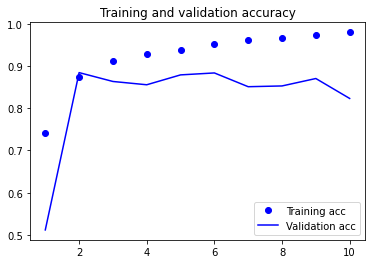

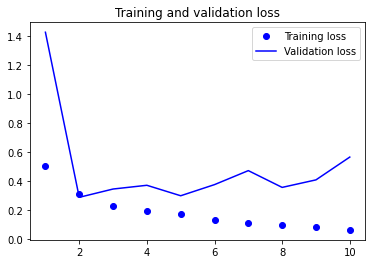

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이 모델은 시간이 비교적 오래 걸리고, Validation loss를 줄이기 위해 epochs 수를 5로 조정해 모델을 다시 돌려볼게요.   
코드가 너무 느리게 돌아가서 런타임을 GPU로 변경했더니 속도가 훨씬 빨라지네요!! (코랩으로 할때는 런타임 GPU로 설정 까먹지 말자,,,ㅠ)


In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 39s 249ms/step - loss: 0.4835 - acc: 0.7650 - val_loss: 0.4179 - val_acc: 0.8102
Epoch 2/5
157/157 [==============================] - 37s 236ms/step - loss: 0.2858 - acc: 0.8885 - val_loss: 0.4061 - val_acc: 0.8278
Epoch 3/5
157/157 [==============================] - 37s 236ms/step - loss: 0.2274 - acc: 0.9132 - val_loss: 0.3267 - val_acc: 0.8660
Epoch 4/5
157/157 [==============================] - 38s 239ms/step - loss: 0.1866 - acc: 0.9306 - val_loss: 0.3314 - val_acc: 0.8564
Epoch 5/5
157/157 [==============================] - 38s 241ms/step - loss: 0.1517 - acc: 0.9473 - val_loss: 0.4845 - val_acc: 0.8490


Accuracy에서는 큰 차이가 없는 것 같아요! epoch 3에서 정확도가 86.6%로 가장 높네요.   
이제는 node 수를 16으로 조정해보겠습니다.

In [9]:
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 36s 230ms/step - loss: 0.4869 - acc: 0.7614 - val_loss: 0.3952 - val_acc: 0.8332
Epoch 2/5
157/157 [==============================] - 34s 218ms/step - loss: 0.2961 - acc: 0.8834 - val_loss: 0.4901 - val_acc: 0.7922
Epoch 3/5
157/157 [==============================] - 34s 217ms/step - loss: 0.2297 - acc: 0.9135 - val_loss: 0.3230 - val_acc: 0.8616
Epoch 4/5
157/157 [==============================] - 34s 218ms/step - loss: 0.1917 - acc: 0.9322 - val_loss: 0.4727 - val_acc: 0.8450
Epoch 5/5
157/157 [==============================] - 34s 217ms/step - loss: 0.1615 - acc: 0.9427 - val_loss: 0.3718 - val_acc: 0.8566


 node=16, epoch=5일 때 최종 accuracy가 가장 높게 나왔습니다!   
 궁금해서 activation을 softmax로 바꿔볼게요

In [10]:
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 36s 229ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 2/5
157/157 [==============================] - 33s 210ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 3/5
157/157 [==============================] - 33s 210ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 4/5
157/157 [==============================] - 33s 211ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 5/5
157/157 [==============================] - 33s 212ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938


이진분류에 사용되는 sigmoid에 비해 softmax는 정확도가 현저히 낮습니다. 각 데이터에 맞는 activation function 선정의 중요성!!